# ML Algorithm for early detection of Alzheimer disease

The purpose of this algorithm is to train a CNN (Convolutional Neural Network) to perform a MRI (Magnetic Resonnance Images) segmentation exercise in order to detect Alzheimer disease by looking at thousands of images from wide variety of brains in different conditions: non demented, very mild demented, mild demented and moderate demented. The dataset has been pulled from Kaggle site (https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset/code)


In [91]:
# import libraries
import os
import shutil
from shutil import copyfile

In [92]:
""" Reviewing the contents of the Dataset"""

source_path_train = "./Dataset"

categories = ["Non_Demented", "Very_Mild_Demented", "Mild_Demented", "Moderate_Demented"]

for i in range(len(categories)):
    if i==0 : print ("Training set data: ")
    dirtrain = "./Dataset/" + categories[i]
    print(f"There are {len(os.listdir(dirtrain))} images of category", categories[i])
 

Training set data: 
There are 3200 images of category Non_Demented
There are 2240 images of category Very_Mild_Demented
There are 896 images of category Mild_Demented
There are 64 images of category Moderate_Demented


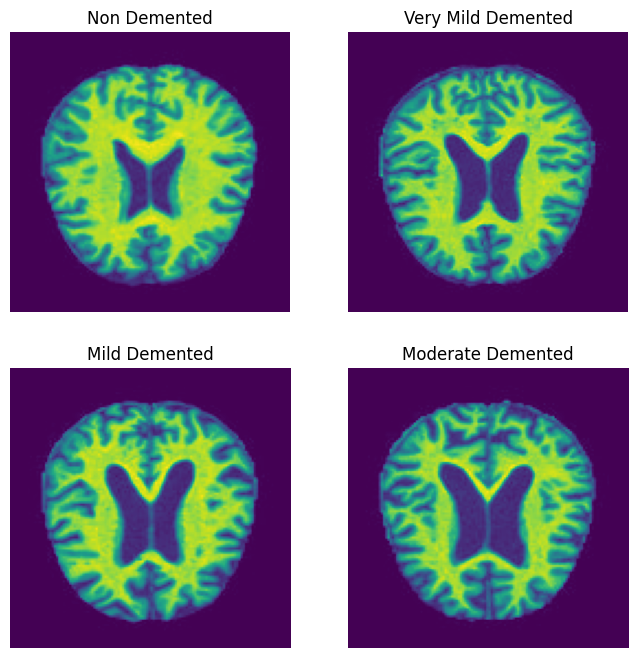

In [93]:
""" We take a look at 4 training samples per each category """

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 2
ncols = 2

pic_index = 1 # Index for iterating over images

train_fnames0 = os.listdir("./Dataset/Non_Demented")
train_fnames1 = os.listdir("./Dataset/Very_Mild_Demented")
train_fnames2 = os.listdir("./Dataset/Mild_Demented")
train_fnames3 = os.listdir("./Dataset/Moderate_Demented")


fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=0


listcat0 = [os.path.join("./Dataset/Non_Demented",fname) for fname in train_fnames0[pic_index-1:pic_index]]
listcat1 = [os.path.join("./Dataset/Very_Mild_Demented",fname) for fname in train_fnames1[pic_index-1:pic_index]]
listcat2 = [os.path.join("./Dataset/Mild_Demented",fname) for fname in train_fnames2[pic_index-1:pic_index]]
listcat3 = [os.path.join("./Dataset/Moderate_Demented",fname) for fname in train_fnames3[pic_index-1:pic_index]]




for i, img_path in enumerate(listcat0 + listcat1 + listcat2 + listcat3):
  # Set up subplot; subplot indices start at 1
  subplot = plt.subplot(nrows, ncols, i + 1)
  subplot.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  if i == 0: 
    plt.title("Non Demented")
  elif i == 1:
    plt.title("Very Mild Demented")
  elif i == 2:
    plt.title("Mild Demented")
  else: plt.title("Moderate Demented")
  plt.imshow(img)

plt.show()



In [94]:

def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets
  
  Args:
    root_path (string) - the base directory path to create subdirectories from
  
  Returns:
    None
  """  

  os.makedirs(os.path.join(root_path,'train'))
  os.makedirs(os.path.join(root_path,'test'))  
  os.makedirs(os.path.join(root_path,'train/Non_demented'))
  os.makedirs(os.path.join(root_path,'train/Very_Mild_Demented'))
  os.makedirs(os.path.join(root_path,'train/Mild_Demented'))
  os.makedirs(os.path.join(root_path,'train/Moderate_Demented'))
  os.makedirs(os.path.join(root_path,'test/Non_demented'))
  os.makedirs(os.path.join(root_path,'test/Very_Mild_Demented'))
  os.makedirs(os.path.join(root_path,'test/Mild_Demented'))
  os.makedirs(os.path.join(root_path,'test/Moderate_Demented'))


In [95]:
SOURCE_DIR = "./Dataset"
for i, filename in enumerate(os.listdir(SOURCE_DIR)):
    if i<10 : print(filename)

Mild_Demented
Moderate_Demented
Non_Demented
Very_Mild_Demented


In [96]:

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """

  files = []
  for filename in os.listdir(SOURCE_DIR):
      file_name = os.path.join(SOURCE_DIR, filename)
      if os.path.getsize(file_name) > 0:
        files.append(filename)
      else:
        print("{} has zero length so discarding".format(filename))
  train_set_size = int(len(files)*SPLIT_SIZE)
  shuffled_data = random.sample(files, len(files))
  training_data = shuffled_data[0:train_set_size]
  testing_data = shuffled_data[train_set_size:len(files)]

  for file in training_data:
      src_file = os.path.join(SOURCE_DIR, file)
      des_file = os.path.join(TRAINING_DIR, file)
      copyfile(src_file, des_file)
  
  for file in testing_data:
      src_file = os.path.join(SOURCE_DIR, file)
      des_file = os.path.join(VALIDATION_DIR, file)
      copyfile(src_file, des_file)    



In [97]:
# Empty directory to prevent FileExistsError is the function is run several times
root_dir = './TrainTest'
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

In [98]:
# Test your split_data function

# Define root directory and subdirectories
create_train_val_dirs(root_path=root_dir)

import random
# Define paths
SOURCE_DIR1= "./Dataset/Non_Demented"
SOURCE_DIR2 = "./Dataset/Mild_Demented"
SOURCE_DIR3= "./Dataset/Very_Mild_Demented"
SOURCE_DIR4 = "./Dataset/Moderate_Demented"

TRAINING_DIR1 = "./TrainTest/train/Non_Demented"
TRAINING_DIR2 = "./TrainTest/train/Mild_Demented"
TRAINING_DIR3 = "./TrainTest/train/Very_Mild_Demented"
TRAINING_DIR4 = "./TrainTest/train/Moderate_Demented"

TEST_DIR1 = "./TrainTest/test/Non_Demented"
TEST_DIR2 = "./TrainTest/test/Mild_Demented"
TEST_DIR3 = "./TrainTest/test/Very_Mild_Demented"
TEST_DIR4 = "./TrainTest/test/Moderate_Demented"


# Define proportion of images used for training
split_size = .8

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(SOURCE_DIR1, TRAINING_DIR1, TEST_DIR1, split_size)
split_data(SOURCE_DIR2, TRAINING_DIR2, TEST_DIR2, split_size)
split_data(SOURCE_DIR3, TRAINING_DIR3, TEST_DIR3, split_size)
split_data(SOURCE_DIR4, TRAINING_DIR4, TEST_DIR4, split_size)

# Check that the number of images matches the expected output
print(f"\nThere are {len(os.listdir(TRAINING_DIR1))} images of Non_Demented for training")
print(f"There are {len(os.listdir(TRAINING_DIR2))} images of Mild_Demented for training")
print(f"There are {len(os.listdir(TRAINING_DIR3))} images of Very_Mild_Demented for training")
print(f"There are {len(os.listdir(TRAINING_DIR4))} images of Moderate_Demented for training")

print(f"\nThere are {len(os.listdir(TEST_DIR1))} images of Non_Demented for testing")
print(f"There are {len(os.listdir(TEST_DIR2))} images of Mild_Demented for testing")
print(f"There are {len(os.listdir(TEST_DIR3))} images of Very_Mild_Demented for testing")
print(f"There are {len(os.listdir(TEST_DIR4))} images of Moderate_Demented for testing")



There are 2560 images of Non_Demented for training
There are 716 images of Mild_Demented for training
There are 1792 images of Very_Mild_Demented for training
There are 51 images of Moderate_Demented for training

There are 640 images of Non_Demented for testing
There are 180 images of Mild_Demented for testing
There are 448 images of Very_Mild_Demented for testing
There are 13 images of Moderate_Demented for testing


## Data Pre-processing

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

source_path_train = "./TrainTest/train"
source_path_test = "./TrainTest/test"

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(source_path_train,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(source_path_test,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


Found 5119 images belonging to 4 classes.
Found 1281 images belonging to 4 classes.


## Build the model

In [100]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 4 neurons, 1 per class. 
    tf.keras.layers.Dense(4, activation='softmax')  
])

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

In [101]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
# Train the model
history = model.fit(train_generator, epochs=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/20
256/256 [==============================] - 64s 240ms/step - loss: 0.9840 - accuracy: 0.5265 - val_loss: 0.7793 - val_accuracy: 0.6500
Epoch 2/20
256/256 [==============================] - 60s 236ms/step - loss: 0.7330 - accuracy: 0.6777 - val_loss: 0.4820 - val_accuracy: 0.8333
Epoch 3/20
256/256 [==============================] - 60s 234ms/step - loss: 0.4793 - accuracy: 0.7947 - val_loss: 0.2311 - val_accuracy: 0.9333
Epoch 4/20
256/256 [==============================] - 61s 238ms/step - loss: 0.2798 - accuracy: 0.8900 - val_loss: 0.1794 - val_accuracy: 0.9500
Epoch 5/20
256/256 [==============================] - 62s 242ms/step - loss: 0.1683 - accuracy: 0.9375 - val_loss: 0.2288 - val_accuracy: 0.9333
Epoch 6/20
256/256 [==============================] - 62s 242ms/step - loss: 0.1096 - accuracy: 0.9609 - val_loss: 0.1398 - val_accuracy: 0.9667
Epoch 7/20
256/256 [==============================] - 64s 250ms/step - loss: 0.0926 - accuracy: 0.9641 - val_loss: 0.2780 - val_ac

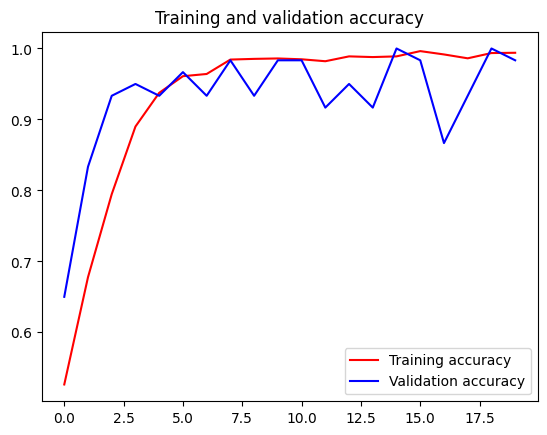

<Figure size 640x480 with 0 Axes>

In [103]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## Model Prediction

1/1 [==============================] - 0s 74ms/step


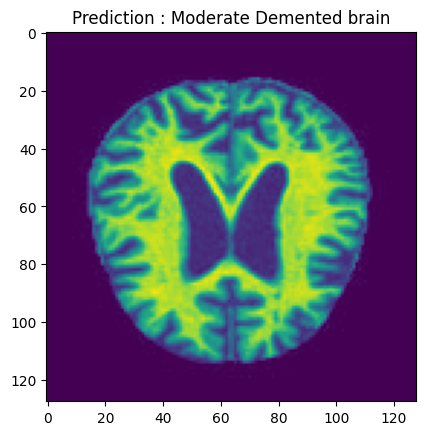

In [128]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

path = "./moderate_7.jpg"
img_prt = mpimg.imread(path)
plt.imshow(img_prt)

img=load_img(path, target_size=(150, 150))
x=img_to_array(img)
x /= 255
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

index = np.argmax(classes[0])

if index == 0: plt.title("Prediction : Mild Demented brain")
if index == 1: plt.title("Prediction : Moderate Demented brain")
if index == 2: plt.title("Prediction : Non Demented brain")
if index == 3: plt.title("Prediction : Very Mild Demented brain")

